学习R语言逆概率加权技术。

# 数据读取

In [1]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
nhefs <- read_csv("../data/nhefs.csv")
nhefs

Rows: 1629 Columns: 64
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (64): seqn, qsmk, death, yrdth, modth, dadth, sbp, dbp, sex, age, race, ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


seqn,qsmk,death,yrdth,modth,dadth,sbp,dbp,sex,age,...,birthcontrol,pregnancies,cholesterol,hightax82,price71,price82,tax71,tax82,price71_82,tax71_82
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
233,0,0,NA,NA,NA,175,96,0,42,...,2,NA,197,0,2.183594,1.739990,1.1022949,0.4619751,0.44378662,0.6403809
235,0,0,NA,NA,NA,123,80,0,36,...,2,NA,301,0,2.346680,1.797363,1.3649902,0.5718994,0.54931641,0.7929688
244,0,0,NA,NA,NA,115,75,1,56,...,0,2,157,0,1.569580,1.513428,0.5512695,0.2309875,0.05619812,0.3202515
245,0,1,85,2,14,148,78,0,68,...,2,NA,174,0,1.506592,1.451904,0.5249023,0.2199707,0.05479431,0.3049927
252,0,0,NA,NA,NA,118,77,0,40,...,2,NA,216,0,2.346680,1.797363,1.3649902,0.5718994,0.54931641,0.7929688
257,0,0,NA,NA,NA,141,83,1,43,...,0,1,212,1,2.209961,2.025879,1.1547852,0.7479248,0.18408203,0.4069824
262,0,0,NA,NA,NA,132,69,1,56,...,0,1,205,NA,NA,NA,NA,NA,NA,NA
266,0,0,NA,NA,NA,100,53,1,29,...,0,2,166,NA,NA,NA,NA,NA,NA,NA
419,0,1,84,10,13,163,79,0,51,...,2,NA,337,0,2.346680,1.797363,1.3649902,0.5718994,0.54931641,0.7929688


In [3]:
summary(nhefs)

      seqn            qsmk            death            yrdth      
 Min.   :  233   Min.   :0.0000   Min.   :0.0000   Min.   :83.00  
 1st Qu.:10607   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:85.00  
 Median :20333   Median :0.0000   Median :0.0000   Median :88.00  
 Mean   :16552   Mean   :0.2627   Mean   :0.1952   Mean   :87.57  
 3rd Qu.:22719   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:90.00  
 Max.   :25061   Max.   :1.0000   Max.   :1.0000   Max.   :92.00  
                                                   NA's   :1311   
     modth            dadth            sbp             dbp        
 Min.   : 1.000   Min.   : 1.00   Min.   : 87.0   Min.   : 47.00  
 1st Qu.: 3.000   1st Qu.: 8.00   1st Qu.:116.0   1st Qu.: 70.00  
 Median : 6.000   Median :15.50   Median :126.0   Median : 77.00  
 Mean   : 6.258   Mean   :15.87   Mean   :128.7   Mean   : 77.74  
 3rd Qu.:10.000   3rd Qu.:24.00   3rd Qu.:140.0   3rd Qu.: 85.00  
 Max.   :12.000   Max.   :31.00   Max.   :229.0   Max.   :130.

In [4]:
str(nhefs)

spc_tbl_ [1,629 x 64] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ seqn             : num [1:1629] 233 235 244 245 252 257 262 266 419 420 ...
 $ qsmk             : num [1:1629] 0 0 0 0 0 0 0 0 0 0 ...
 $ death            : num [1:1629] 0 0 0 1 0 0 0 0 1 1 ...
 $ yrdth            : num [1:1629] NA NA NA 85 NA NA NA NA 84 86 ...
 $ modth            : num [1:1629] NA NA NA 2 NA NA NA NA 10 10 ...
 $ dadth            : num [1:1629] NA NA NA 14 NA NA NA NA 13 17 ...
 $ sbp              : num [1:1629] 175 123 115 148 118 141 132 100 163 184 ...
 $ dbp              : num [1:1629] 96 80 75 78 77 83 69 53 79 106 ...
 $ sex              : num [1:1629] 0 0 1 0 0 1 1 1 0 0 ...
 $ age              : num [1:1629] 42 36 56 68 40 43 56 29 51 43 ...
 $ race             : num [1:1629] 1 0 1 1 0 1 0 0 0 0 ...
 $ income           : num [1:1629] 19 18 15 15 18 11 19 22 18 16 ...
 $ marital          : num [1:1629] 2 2 3 3 2 4 2 2 2 2 ...
 $ school           : num [1:1629] 7 9 11 5 11 9 12 12 10 11 ...
 $ edu

In [5]:
nhefs$cens <- ifelse(is.na(nhefs$wt82), 1, 0)

In [6]:
# provisionally ignore subjects with missing values for weight in 1982
nhefs.nmv <- nhefs[which(!is.na(nhefs$wt82)),]

In [7]:
lm(wt82_71 ~ qsmk, data=nhefs.nmv)


Call:
lm(formula = wt82_71 ~ qsmk, data = nhefs.nmv)

Coefficients:
(Intercept)         qsmk  
      1.984        2.541  


In [8]:
summary(nhefs.nmv[which(nhefs.nmv$qsmk==0),]$age)
summary(nhefs.nmv[which(nhefs.nmv$qsmk==0),]$wt71) 
summary(nhefs.nmv[which(nhefs.nmv$qsmk==0),]$smokeintensity) 
summary(nhefs.nmv[which(nhefs.nmv$qsmk==0),]$smokeyrs) 

summary(nhefs.nmv[which(nhefs.nmv$qsmk==1),]$age)
summary(nhefs.nmv[which(nhefs.nmv$qsmk==1),]$wt71) 
summary(nhefs.nmv[which(nhefs.nmv$qsmk==1),]$smokeintensity) 
summary(nhefs.nmv[which(nhefs.nmv$qsmk==1),]$smokeyrs) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   33.00   42.00   42.79   51.00   72.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.82   59.19   68.49   70.30   79.38  151.73 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   15.00   20.00   21.19   30.00   60.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   15.00   23.00   24.09   32.00   64.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   35.00   46.00   46.17   56.00   74.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.58   60.67   71.21   72.35   81.08  136.98 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    10.0    20.0    18.6    25.0    80.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   15.00   26.00   26.03   35.00   60.00 

In [9]:
table(nhefs.nmv$qsmk, nhefs.nmv$sex)
prop.table(table(nhefs.nmv$qsmk, nhefs.nmv$sex), 1)

table(nhefs.nmv$qsmk, nhefs.nmv$race)
prop.table(table(nhefs.nmv$qsmk, nhefs.nmv$race), 1)

table(nhefs.nmv$qsmk, nhefs.nmv$education)
prop.table(table(nhefs.nmv$qsmk, nhefs.nmv$education), 1)

table(nhefs.nmv$qsmk, nhefs.nmv$exercise)
prop.table(table(nhefs.nmv$qsmk, nhefs.nmv$exercise), 1)

table(nhefs.nmv$qsmk, nhefs.nmv$active)
prop.table(table(nhefs.nmv$qsmk, nhefs.nmv$active), 1)

   
      0   1
  0 542 621
  1 220 183

   
            0         1
  0 0.4660361 0.5339639
  1 0.5459057 0.4540943

   
      0   1
  0 993 170
  1 367  36

   
             0          1
  0 0.85382631 0.14617369
  1 0.91066998 0.08933002

   
      1   2   3   4   5
  0 210 266 480  92 115
  1  81  74 157  29  62

   
             1          2          3          4          5
  0 0.18056750 0.22871883 0.41272571 0.07910576 0.09888220
  1 0.20099256 0.18362283 0.38957816 0.07196030 0.15384615

   
      0   1   2
  0 237 485 441
  1  63 176 164

   
            0         1         2
  0 0.2037833 0.4170249 0.3791917
  1 0.1563275 0.4367246 0.4069479

   
      0   1   2
  0 532 527 104
  1 170 188  45

   
            0         1         2
  0 0.4574377 0.4531384 0.0894239
  1 0.4218362 0.4665012 0.1116625

# 倾向得分加权

In [10]:
# Logit模型
fit <- glm(
  qsmk ~ sex + race + age + I(age^2) + 
  as.factor(education) + smokeintensity + 
  I(smokeintensity^2) + smokeyrs + I(smokeyrs^2) + 
  as.factor(exercise) + as.factor(active) + wt71 + I(wt71^2), 
  family = binomial(),
  data = nhefs.nmv
)

summary(fit)


Call:
glm(formula = qsmk ~ sex + race + age + I(age^2) + as.factor(education) + 
    smokeintensity + I(smokeintensity^2) + smokeyrs + I(smokeyrs^2) + 
    as.factor(exercise) + as.factor(active) + wt71 + I(wt71^2), 
    family = binomial(), data = nhefs.nmv)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.2425191  1.3808360  -1.624 0.104369    
sex                   -0.5274782  0.1540496  -3.424 0.000617 ***
race                  -0.8392636  0.2100665  -3.995 6.46e-05 ***
age                    0.1212052  0.0512663   2.364 0.018068 *  
I(age^2)              -0.0008246  0.0005361  -1.538 0.124039    
as.factor(education)2 -0.0287755  0.1983506  -0.145 0.884653    
as.factor(education)3  0.0864318  0.1780850   0.485 0.627435    
as.factor(education)4  0.0636010  0.2732108   0.233 0.815924    
as.factor(education)5  0.4759606  0.2262237   2.104 0.035384 *  
smokeintensity        -0.0772704  0.0152499  -5.067 4.04e-07 ***
I(smokein

In [11]:
# 得到预测概率
p.qsmk.obs <- ifelse(
  nhefs.nmv$qsmk == 0,
  1 - predict(fit, type = "response"),
  predict(fit, type = "response")
)

In [12]:
# 计算逆概率权重
nhefs.nmv$w <- 1/p.qsmk.obs
summary(nhefs.nmv$w)
sd(nhefs.nmv$w)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.054   1.230   1.373   1.996   1.990  16.700 

[1] 1.474787

In [13]:
library("geepack")
msm.w <- geeglm(
  wt82_71 ~ qsmk,
  data=nhefs.nmv,
  weights=w,
  id=seqn,
  corstr="independence"
)

summary(msm.w)


Call:
geeglm(formula = wt82_71 ~ qsmk, data = nhefs.nmv, weights = w, 
    id = seqn, corstr = "independence")

 Coefficients:
            Estimate Std.err  Wald Pr(>|W|)    
(Intercept)   1.7800  0.2247 62.73 2.33e-15 ***
qsmk          3.4405  0.5255 42.87 5.86e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation structure = independence 
Estimated Scale Parameters:

            Estimate Std.err
(Intercept)    65.06   4.221
Number of clusters:   1566  Maximum cluster size: 1 

In [14]:
msm.w <- lm(
  wt82_71 ~ qsmk,
  data=nhefs.nmv,
  weights=w
)

summary(msm.w)


Call:
lm(formula = wt82_71 ~ qsmk, data = nhefs.nmv, weights = w)

Weighted Residuals:
   Min     1Q Median     3Q    Max 
-55.53  -5.38   0.00   5.14  82.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.780      0.288    6.18  8.4e-10 ***
qsmk           3.441      0.408    8.43  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.4 on 1564 degrees of freedom
Multiple R-squared:  0.0435,	Adjusted R-squared:  0.0429 
F-statistic: 71.1 on 1 and 1564 DF,  p-value: <2e-16


In [36]:
library(sandwich)
library(lmtest)

vcov <- vcovHC(msm.w, type = "HC0")
coeftest(msm.w, vcov = vcov)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.780      0.225    7.92  4.5e-15 ***
qsmk           3.441      0.525    6.55  7.9e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [16]:
# 使用survey包的svyglm函数
library("survey")

nhefs.svy <- svydesign(
  ids = ~1,
  weights = ~w,
  data = nhefs.nmv
)

msm.svy <- svyglm(
  wt82_71 ~ qsmk,
  design = nhefs.svy
)

summary(msm.svy)


Call:
svyglm(formula = wt82_71 ~ qsmk, design = nhefs.svy)

Survey design:
svydesign(ids = ~1, weights = ~w, data = nhefs.nmv)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.780      0.225    7.92  4.5e-15 ***
qsmk           3.441      0.526    6.55  8.0e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 65.1)

Number of Fisher Scoring iterations: 2


In [152]:
# no association between sex and qsmk in pseudo-population
xtabs(nhefs.nmv$w ~ nhefs.nmv$sex + nhefs.nmv$qsmk)

             nhefs.nmv$qsmk
nhefs.nmv$sex   0   1
            0 764 764
            1 802 797

# 逆概率稳定权重

In [25]:
# Logit模型
denom.fit <- glm(
  qsmk ~ as.factor(sex) + as.factor(race) + age + I(age^2) +
  as.factor(education) + smokeintensity +
  I(smokeintensity^2) + smokeyrs + I(smokeyrs^2) +
  as.factor(exercise) + as.factor(active) + wt71 + I(wt71^2),
  family = binomial(),
  data = nhefs.nmv
)

summary(denom.fit)


Call:
glm(formula = qsmk ~ as.factor(sex) + as.factor(race) + age + 
    I(age^2) + as.factor(education) + smokeintensity + I(smokeintensity^2) + 
    smokeyrs + I(smokeyrs^2) + as.factor(exercise) + as.factor(active) + 
    wt71 + I(wt71^2), family = binomial(), data = nhefs.nmv)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.242519   1.380836   -1.62  0.10437    
as.factor(sex)1       -0.527478   0.154050   -3.42  0.00062 ***
as.factor(race)1      -0.839264   0.210067   -4.00  6.5e-05 ***
age                    0.121205   0.051266    2.36  0.01807 *  
I(age^2)              -0.000825   0.000536   -1.54  0.12404    
as.factor(education)2 -0.028776   0.198351   -0.15  0.88465    
as.factor(education)3  0.086432   0.178085    0.49  0.62744    
as.factor(education)4  0.063601   0.273211    0.23  0.81592    
as.factor(education)5  0.475961   0.226224    2.10  0.03538 *  
smokeintensity        -0.077270   0.015250   -5.07  4.0e-07 **

In [26]:
# 得到预测概率
pd.qsmk <- predict(denom.fit, type = "response")

In [27]:
# 拟合Logit模型用于预测处理概率
numer.fit <- glm(qsmk~1, family = binomial(), data = nhefs.nmv)
summary(numer.fit)


Call:
glm(formula = qsmk ~ 1, family = binomial(), data = nhefs.nmv)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0598     0.0578   -18.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1786.1  on 1565  degrees of freedom
Residual deviance: 1786.1  on 1565  degrees of freedom
AIC: 1788

Number of Fisher Scoring iterations: 4


In [28]:
pn.qsmk <- predict(numer.fit, type = "response")

In [112]:
# 计算权重
nhefs.nmv$sw <- ifelse(
  nhefs.nmv$qsmk == 0,
  ((1 - pn.qsmk) / (1 - pd.qsmk)),
  (pn.qsmk / pd.qsmk)
)

summary(nhefs.nmv$sw)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.331   0.867   0.950   0.999   1.079   4.298 

In [113]:
# 不加权回归
msm <- lm(wt82_71 ~ qsmk, data = nhefs.nmv)

summary(msm)


Call:
lm(formula = wt82_71 ~ qsmk, data = nhefs.nmv)

Residuals:
   Min     1Q Median     3Q    Max 
-43.26  -4.02   0.03   4.25  46.55 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.984      0.229    8.67  < 2e-16 ***
qsmk           2.541      0.451    5.63  2.1e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.8 on 1564 degrees of freedom
Multiple R-squared:  0.0199,	Adjusted R-squared:  0.0193 
F-statistic: 31.7 on 1 and 1564 DF,  p-value: 2.11e-08


In [114]:
# 回归分析
msm.sw <- lm(
  wt82_71 ~ qsmk,
  data = nhefs.nmv,
  weights = sw
)

summary(msm.sw)


Call:
lm(formula = wt82_71 ~ qsmk, data = nhefs.nmv, weights = sw)

Weighted Residuals:
   Min     1Q Median     3Q    Max 
-42.61  -3.96   0.00   4.27  47.92 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.780      0.229    7.79  1.2e-14 ***
qsmk           3.441      0.451    7.63  4.1e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.79 on 1564 degrees of freedom
Multiple R-squared:  0.0359,	Adjusted R-squared:  0.0353 
F-statistic: 58.2 on 1 and 1564 DF,  p-value: 4.11e-14


In [116]:
# 使用svyglm函数
library(survey)

nhefs.svy <- svydesign(
  ids = ~1,
  weights = ~sw,
  data = nhefs.nmv
)

msm.svy <- svyglm(
  wt82_71 ~ qsmk,
  design = nhefs.svy
)

summary(msm.svy)


Call:
svyglm(formula = wt82_71 ~ qsmk, design = nhefs.svy)

Survey design:
svydesign(ids = ~1, weights = ~sw, data = nhefs.nmv)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.780      0.225    7.92  4.5e-15 ***
qsmk           3.441      0.526    6.55  8.0e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 60.76)

Number of Fisher Scoring iterations: 2


# 连续处理变量加权

In [21]:
# Analysis restricted to subjects reporting <=25 cig/day at baseline
nhefs.nmv.s <- subset(nhefs.nmv, smokeintensity <=25)

In [22]:
# estimation of denominator of ip weights
den.fit.obj <- lm(smkintensity82_71 ~ as.factor(sex) + 
  as.factor(race) + age + I(age^2) + 
  as.factor(education) + smokeintensity + I(smokeintensity^2) +
  smokeyrs + I(smokeyrs^2) + as.factor(exercise) + as.factor(active) + wt71  + 
  I(wt71^2),
  data = nhefs.nmv.s
)

p.den <- predict(den.fit.obj, type = "response")
dens.den <- dnorm(nhefs.nmv.s$smkintensity82_71, p.den, summary(den.fit.obj)$sigma)

In [23]:
# estimation of numerator of ip weights
num.fit.obj <- lm(smkintensity82_71 ~ 1, data = nhefs.nmv.s)
p.num <- predict(num.fit.obj, type = "response")
dens.num <- dnorm(nhefs.nmv.s$smkintensity82_71, p.num, summary(num.fit.obj)$sigma)

In [24]:
# 计算权重
nhefs.nmv.s$sw.a = dens.num/dens.den
summary(nhefs.nmv.s$sw.a)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.194   0.887   0.971   0.997   1.054   5.102 

In [25]:
msm.sw.cont <- lm(
  wt82_71 ~ smkintensity82_71 + I(smkintensity82_71*smkintensity82_71),
  data=nhefs.nmv.s,
  weights=sw.a
)

summary(msm.sw.cont)


Call:
lm(formula = wt82_71 ~ smkintensity82_71 + I(smkintensity82_71 * 
    smkintensity82_71), data = nhefs.nmv.s, weights = sw.a)

Weighted Residuals:
   Min     1Q Median     3Q    Max 
-36.75  -4.08   0.15   4.16  55.03 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               2.00452    0.26545    7.55  8.7e-14
smkintensity82_71                        -0.10899    0.02152   -5.06  4.8e-07
I(smkintensity82_71 * smkintensity82_71)  0.00269    0.00105    2.57     0.01
                                            
(Intercept)                              ***
smkintensity82_71                        ***
I(smkintensity82_71 * smkintensity82_71) *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.77 on 1159 degrees of freedom
Multiple R-squared:  0.0233,	Adjusted R-squared:  0.0216 
F-statistic: 13.8 on 2 and 1159 DF,  p-value: 1.16e-06


In [26]:
# 无权重回归
msm.cont <- lm(
  wt82_71 ~ smkintensity82_71 + I(smkintensity82_71*smkintensity82_71),
  data=nhefs.nmv.s
)

summary(msm.cont)


Call:
lm(formula = wt82_71 ~ smkintensity82_71 + I(smkintensity82_71 * 
    smkintensity82_71), data = nhefs.nmv.s)

Residuals:
   Min     1Q Median     3Q    Max 
-32.33  -4.24   0.16   4.30  46.82 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               1.88738    0.26708    7.07  2.7e-12
smkintensity82_71                        -0.06279    0.02158   -2.91  0.00368
I(smkintensity82_71 * smkintensity82_71)  0.00463    0.00122    3.80  0.00015
                                            
(Intercept)                              ***
smkintensity82_71                        ** 
I(smkintensity82_71 * smkintensity82_71) ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.69 on 1159 degrees of freedom
Multiple R-squared:  0.0204,	Adjusted R-squared:  0.0187 
F-statistic: 12.1 on 2 and 1159 DF,  p-value: 6.6e-06


In [35]:
# 稳健标准误
library(sandwich)
library(lmtest)

vcov <- vcovHC(msm.sw.cont, type = "HC0")
coeftest(msm.sw.cont, vcov = vcov)


t test of coefficients:

                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               2.00452    0.29512    6.79  1.8e-11
smkintensity82_71                        -0.10899    0.03154   -3.46  0.00057
I(smkintensity82_71 * smkintensity82_71)  0.00269    0.00242    1.11  0.26512
                                            
(Intercept)                              ***
smkintensity82_71                        ***
I(smkintensity82_71 * smkintensity82_71)    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [27]:
# 使用svyglm函数
nhefs.svy.s <- svydesign(
  ids = ~1,
  weights = ~sw.a,
  data = nhefs.nmv.s
)

msm.svy.cont <- svyglm(
  wt82_71 ~ smkintensity82_71 + I(smkintensity82_71*smkintensity82_71),
  design = nhefs.svy.s
)

summary(msm.svy.cont)


Call:
svyglm(formula = wt82_71 ~ smkintensity82_71 + I(smkintensity82_71 * 
    smkintensity82_71), design = nhefs.svy.s)

Survey design:
svydesign(ids = ~1, weights = ~sw.a, data = nhefs.nmv.s)

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               2.00452    0.29525    6.79  1.8e-11
smkintensity82_71                        -0.10899    0.03155   -3.45  0.00057
I(smkintensity82_71 * smkintensity82_71)  0.00269    0.00242    1.11  0.26533
                                            
(Intercept)                              ***
smkintensity82_71                        ***
I(smkintensity82_71 * smkintensity82_71)    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 60.52)

Number of Fisher Scoring iterations: 2


# 二分类治疗变量加权

In [39]:
# Logit模型
denom.fit <- glm(
  qsmk ~ as.factor(sex) + as.factor(race) + age + I(age^2) +
  as.factor(education) + smokeintensity +
  I(smokeintensity^2) + smokeyrs + I(smokeyrs^2) +
  as.factor(exercise) + as.factor(active) + wt71 + I(wt71^2),
  family = binomial(),
  data = nhefs.nmv
)

# 得到预测概率
pd.qsmk <- predict(denom.fit, type = "response")

# 拟合Logit模型用于预测处理概率
numer.fit <- glm(qsmk~1, family = binomial(), data = nhefs.nmv)

# 得到预测概率
pn.qsmk <- predict(numer.fit, type = "response")

# 计算权重
nhefs.nmv$sw <- ifelse(
  nhefs.nmv$qsmk == 0,
  ((1 - pn.qsmk) / (1 - pd.qsmk)),
  (pn.qsmk / pd.qsmk)
)

table(nhefs.nmv$qsmk, nhefs.nmv$death)

   
      0   1
  0 963 200
  1 312  91

In [40]:
# 加权Logit回归
msm.logistic <- glm(
  death ~ qsmk,
  data = nhefs.nmv,
  family = binomial(),
  weights = sw
)

summary(msm.logistic)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"



Call:
glm(formula = death ~ qsmk, family = binomial(), data = nhefs.nmv, 
    weights = sw)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.4905     0.0757   -19.7   <2e-16 ***
qsmk          0.0301     0.1484     0.2     0.84    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1498.3  on 1565  degrees of freedom
Residual deviance: 1498.2  on 1564  degrees of freedom
AIC: 1514

Number of Fisher Scoring iterations: 4


In [154]:
# 使用svyglm函数
nhefs.svy <- svydesign(
  ids = ~1,
  weights = ~sw,
  data = nhefs.nmv
)

msm.svy <- svyglm(
  death ~ qsmk,
  design = nhefs.svy,
  family = binomial()
)

summary(msm.svy)


Call:
svyglm(formula = death ~ qsmk, design = nhefs.svy, family = binomial())

Survey design:
svydesign(ids = ~1, weights = ~sw, data = nhefs.nmv)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4905     0.0790  -18.88   <2e-16 ***
qsmk          0.0301     0.1574    0.19     0.85    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

Number of Fisher Scoring iterations: 4


# 处理删失

In [41]:
# estimation of denominator of ip weights for A
denom.fit <- glm(qsmk ~ as.factor(sex) + as.factor(race) + age + I(age^2) + 
  as.factor(education) + smokeintensity + 
  I(smokeintensity^2) + smokeyrs + I(smokeyrs^2) + 
  as.factor(exercise) + as.factor(active) + wt71 + I(wt71^2), 
                 family = binomial(), data = nhefs)
summary(denom.fit)


Call:
glm(formula = qsmk ~ as.factor(sex) + as.factor(race) + age + 
    I(age^2) + as.factor(education) + smokeintensity + I(smokeintensity^2) + 
    smokeyrs + I(smokeyrs^2) + as.factor(exercise) + as.factor(active) + 
    wt71 + I(wt71^2), family = binomial(), data = nhefs)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.988902   1.241279   -1.60  0.10909    
as.factor(sex)1       -0.507522   0.148232   -3.42  0.00062 ***
as.factor(race)1      -0.850231   0.205872   -4.13  3.6e-05 ***
age                    0.103013   0.048900    2.11  0.03515 *  
I(age^2)              -0.000605   0.000507   -1.19  0.23297    
as.factor(education)2 -0.098320   0.190655   -0.52  0.60607    
as.factor(education)3  0.015699   0.170714    0.09  0.92673    
as.factor(education)4 -0.042526   0.264276   -0.16  0.87216    
as.factor(education)5  0.379663   0.220395    1.72  0.08495 .  
smokeintensity        -0.065156   0.014759   -4.41  1.0e-05 ***
I(

In [42]:
pd.qsmk <- predict(denom.fit, type = "response")

# R包学习

In [43]:
install.packages("ipw") 


The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpkmLy7k/downloaded_packages


## 分类处理变量

In [47]:
library(tidyverse)
library(scales) 


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




In [48]:
# 设置随机种子
set.seed(1234)

# 模拟1138个人
n_people <- 1138

net_data <- tibble(
  # 产生一个ID属性
  id = 1:n_people,
  # 产生收入变量，正态分布，500 ± 300
  income = rnorm(n_people, mean = 500, sd = 75)
) %>% 
  # 产生健康变量，beta分布，中心在70ish处
  mutate(health_base = rbeta(n_people, shape1 = 7, shape2 = 4) * 100,
         # 收入增加一美元，健康上升0.02
         health_income_effect = income * 0.02,
         # 产生最终健康得分并加入噪音
         health = health_base + health_income_effect + rnorm(n_people, mean = 0, sd = 3),
         # 标准化，保证不超过100
         health = rescale(health, to = c(min(health), 100))) %>% 
  # 基于收入、健康和随机噪音生成蚊帐变量
  mutate(net_score = (0.5 * income) + (1.5 * health) + rnorm(n_people, mean = 0, sd = 15),
         # 将蚊帐使用变量标准化到0.05-0.95区间，产生蚊帐使用概率变量
         net_probability = rescale(net_score, to = c(0.05, 0.95)),
         # 使用概率生成0/1随机数
         net = rbinom(n_people, 1, net_probability)) %>% 
  # 最后基于收入、健康和蚊帐使用变量和随机噪音生成疟疾风险变量
  mutate(malaria_risk_base = rbeta(n_people, shape1 = 4, shape2 = 5) * 100,
         # 使用蚊帐，使得风险下降10，收入上升风险也会下降
         malaria_effect = (-30 * net) + (-1.9 * health) + (-0.1 * income),
         # 产生最后的风险变量，加入噪音
         malaria_risk = malaria_risk_base + malaria_effect + rnorm(n_people, 0, sd = 3),
         # 标准化保证不小于0
         malaria_risk = rescale(malaria_risk, to = c(5, 70))) %>% 
  select(-c(health_base, health_income_effect, net_score, net_probability, 
            malaria_risk_base, malaria_effect))

head(net_data)
## # A tibble: 6 × 5
##      id income health   net malaria_risk
##   <int>  <dbl>  <dbl> <int>        <dbl>
## 1     1   409.   63.1     0         45.1
## 2     2   521.   83.5     1         23.4
## 3     3   581.   73.0     0         36.5
## 4     4   324.   60.6     0         58.7
## 5     5   532.   73.4     1         32.7
## 6     6   538.   42.6     0         52.5

id,income,health,net,malaria_risk
<int>,<dbl>,<dbl>,<int>,<dbl>
1,409,63.1,0,45.1
2,521,83.5,1,23.4
3,581,73.0,0,36.5
4,324,60.6,0,58.7
5,532,73.4,1,32.7
6,538,42.6,0,52.5


### {ipw}包

In [49]:
library(ipw)

In [51]:
# ipwpoint() 不能处理 tibbles类型，强制转换为 data.frame
weights_ipwpoint <- ipwpoint(
  exposure = net,
  family = "binomial",  # The treatment is binary
  link = "logit",
  denominator = ~ income + health,
  data = as.data.frame(net_data)
)

# 结果相同
head(weights_ipwpoint$ipw.weights)
## [1] 1.61 1.59 2.93 1.36 1.68 1.85

[1] 1.61 1.59 2.93 1.36 1.68 1.85

In [52]:
net_data_ipwpoint <- net_data %>% 
  mutate(ipw = weights_ipwpoint$ipw.weights)

model_net_ipwpoint <- lm(malaria_risk ~ net, 
                         data = net_data_ipwpoint, weights = ipw)
tidy(model_net_ipwpoint)
## # A tibble: 2 × 5
##   term        estimate std.error statistic  p.value
##   <chr>          <dbl>     <dbl>     <dbl>    <dbl>
## 1 (Intercept)     40.4     0.409      98.8 0       
## 2 net            -10.5     0.578     -18.3 1.83e-65

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),40.4,0.409,98.8,0.00e+00
net,-10.5,0.578,-18.3,1.83e-65


### {WeightIt}包

In [53]:
install.packages("WeightIt")

also installing the dependencies 'cobalt', 'chk'





The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpkmLy7k/downloaded_packages


In [54]:
library(WeightIt)

weights_weightit <- weightit(net ~ income + health, 
                             data = net_data, 
                             estimand = "ATE",  # 取ATE
                             method = "ps")  # 使用倾向得分来计算权重
weights_weightit
## A weightit object
##  - method: "glm" (propensity score weighting with GLM)
##  - number of obs.: 1138
##  - sampling weights: none
##  - treatment: 2-category
##  - estimand: ATE
##  - covariates: income, health

# 运行下面命令可以得到更多细节
# summary(weights_weightit)

# 和其他方法结果相同
head(weights_weightit$weights)
## [1] 1.61 1.59 2.93 1.36 1.68 1.85

A weightit object
 - method: "glm" (propensity score weighting with GLM)
 - number of obs.: 1138
 - sampling weights: none
 - treatment: 2-category
 - estimand: ATE
 - covariates: income, health

[1] 1.61 1.59 2.93 1.36 1.68 1.85

In [55]:
net_data_weightit <- net_data %>% 
  mutate(ipw = weights_weightit$weights)

model_net_weightit <- lm(malaria_risk ~ net, 
                         data = net_data_weightit, weights = ipw)
tidy(model_net_weightit)
## # A tibble: 2 × 5
##   term        estimate std.error statistic  p.value
##   <chr>          <dbl>     <dbl>     <dbl>    <dbl>
## 1 (Intercept)     40.4     0.409      98.8 0       
## 2 net            -10.5     0.578     -18.3 1.83e-65

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),40.4,0.409,98.8,0.00e+00
net,-10.5,0.578,-18.3,1.83e-65


## 连续处理变量

In [63]:
library(broom)
library(truncnorm) 

In [64]:
# 设置随机种子
set.seed(1234)

# 模拟1504个人
n_people <- 1504

grant_data <- tibble(
  # 产生一个ID属性
  id = 1:n_people,
  # 产生收入变量，正态分布，500 ± 300
  income = rnorm(n_people, mean = 500, sd = 75)
) %>%
  # 产生健康变量，beta分布，中心在70ish处
  mutate(health_base = rbeta(n_people, shape1 = 7, shape2 = 4) * 100,
         # 收入增加一美元，健康上升0.02
         health_income_effect = income * 0.02,
         # 产生最终健康得分并加入噪音
         health = health_base + health_income_effect + rnorm(n_people, mean = 0, sd = 3),
         # 标准化保证不超过100
         health = rescale(health, to = c(min(health), 100))) %>% 
  # 生成赠款变量
  mutate(grant_base = rtruncnorm(n_people, mean = 18, sd = 10, a = 5, b = 40),
         # 对于低收入人群和低健康人群，赠款较高
         grant_effect = (income * -0.25) + (health * -0.5),
         # 产生最终赠款金额，并且加入噪音，标准化
         grant = grant_base + grant_effect + rnorm(n_people, mean = 0, sd = 8),
         grant = round(rescale(grant, to = c(5, 40)), 0)) %>% 
  # 最后基于收入、健康、赠款、噪音产生一个疟疾风险变量
  mutate(malaria_risk_base = rbeta(n_people, shape1 = 4, shape2 = 5) * 100,
         # 赠款上升，风险降低
         malaria_effect = (-40 * grant) + (-25 * health) + (-0.05 * income),
         # 产生最终疟疾风险并且加入噪音
         malaria_risk = malaria_risk_base + malaria_effect + rnorm(n_people, 0, sd = 3),
         # 标准化保证不小于0
         malaria_risk = rescale(malaria_risk, to = c(5, 70))) %>% 
  select(-c(health_base, health_income_effect, grant_base, grant_effect, 
            malaria_risk_base, malaria_effect))

head(grant_data)
## # A tibble: 6 × 5
##      id income health grant malaria_risk
##   <int>  <dbl>  <dbl> <dbl>        <dbl>
## 1     1   409.   70.2    27         26.3
## 2     2   521.   75.3    18         33.3
## 3     3   581.   62.6    20         42.3
## 4     4   324.   83.9    28         11.8
## 5     5   532.   74.3    20         31.8
## 6     6   538.   75.9    15         36.2

id,income,health,grant,malaria_risk
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,409,70.2,27,26.3
2,521,75.3,18,33.3
3,581,62.6,20,42.3
4,324,83.9,28,11.8
5,532,74.3,20,31.8
6,538,75.9,15,36.2


### {ipw}包

In [65]:
weights_continuous_ipwpoint <- ipwpoint(
  exposure = grant,
  family = "gaussian",
  numerator = ~ 1,
  denominator = ~ health + income,
  data = as.data.frame(grant_data)
)

# 结果相同
head(weights_continuous_ipwpoint$ipw.weights)
## [1] 0.288 0.492 0.687 0.177 0.499 0.748

[1] 0.288 0.492 0.687 0.177 0.499 0.748

In [66]:
grant_data_ipwpoint <- grant_data %>% 
  mutate(ipw = weights_continuous_ipwpoint$ipw.weights)

model_grant_ipwpoint <- lm(malaria_risk ~ grant, 
                           data = grant_data_ipwpoint, weights = ipw)
tidy(model_grant_ipwpoint)
## # A tibble: 2 × 5
##   term        estimate std.error statistic   p.value
##   <chr>          <dbl>     <dbl>     <dbl>     <dbl>
## 1 (Intercept)    58.4     1.79        32.6 1.95e-176
## 2 grant          -1.11    0.0806     -13.7 1.45e- 40

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),58.42,1.7939,32.6,1.95e-176
grant,-1.11,0.0806,-13.7,1.45e-40


### {WiightIt}包

In [67]:
weights_weightit <- weightit(grant ~ income + health, 
                             data = grant_data, 
                             stabilize = TRUE)
weights_weightit
## A weightit object
##  - method: "glm" (propensity score weighting with GLM)
##  - number of obs.: 1504
##  - sampling weights: none
##  - treatment: continuous
##  - covariates: income, health

# 运行下面命令可以看到更为详细的结果
# summary(weights_weightit)

# 结果与其他方法不同
head(weights_weightit$weights)
## [1] 0.580 0.990 1.384 0.356 1.005 1.506

Warning message:
"Setting `stabilize = TRUE` does nothing for continuous treatments, so
it will be set to `FALSE`. See `help("weightit")` for details."


A weightit object
 - method: "glm" (propensity score weighting with GLM)
 - number of obs.: 1504
 - sampling weights: none
 - treatment: continuous
 - covariates: income, health

[1] 0.580 0.990 1.384 0.356 1.005 1.506

In [70]:
grant_data_weightit <- grant_data %>% 
  mutate(ipw = weights_weightit$weights)

model_grant_weightit <- lm(malaria_risk ~ grant, 
                           data = grant_data_weightit, weights = ipw)
tidy(model_grant_weightit)
## # A tibble: 2 × 5
##   term        estimate std.error statistic   p.value
##   <chr>          <dbl>     <dbl>     <dbl>     <dbl>
## 1 (Intercept)    58.4     1.79        32.6 1.95e-176
## 2 grant          -1.11    0.0806     -13.7 1.45e- 40

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),58.44,1.7940,32.6,1.57e-176
grant,-1.11,0.0806,-13.8,1.23e-40


# 测试

进行一场试验，我想探索一下直接用WLS处理逆概率加权到底对不对。

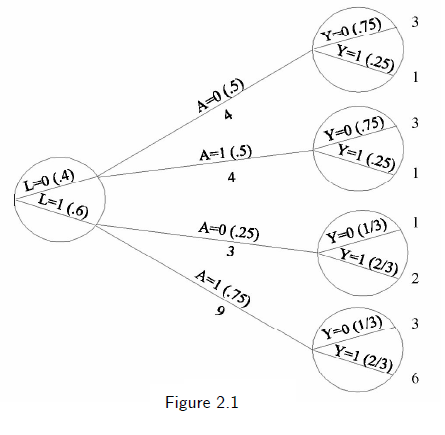

In [95]:
# 生成数据框，有L、A、Y三列
# 其中
# L = 0, A = 0, Y = 0有3个
# L = 0, A = 0, Y = 1有1个
# L = 0, A = 1, Y = 0有3个
# L = 0, A = 1, Y = 1有1个
# L = 1, A = 0, Y = 0有1个
# L = 1, A = 0, Y = 1有2个
# L = 1, A = 1, Y = 0有3个
# L = 1, A = 1, Y = 1有6个
data <- data.frame(
  L = c(
    0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
  ),
  A = c(
    0, 0, 0, 0, 1, 1, 1, 1,
    0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1
  ),
  Y = c(
    0, 0, 0, 1, 0, 0, 0, 1,
    0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1
  )
)

data

L,A,Y
<dbl>,<dbl>,<dbl>
0,0,0
0,0,0
0,0,0
0,0,1
0,1,0
0,1,0
0,1,0
0,1,1
1,0,0


In [96]:
# 保存data为csv文件
write.csv(data, "data.csv", row.names = FALSE)

In [97]:
# 使用ipw包中的ipwpoint()函数计算IP权重
library(ipw)

weights <- ipwpoint(
  exposure = A,
  family = "binomial",
  link = "logit",
  denominator = ~ L,
  data = data
)

data$ipw <- weights$ipw.weights

sum(data$ipw)

[1] 40

In [98]:
# 构造稳定化权重
weights_stabilized <- ipwpoint(
  exposure = A,
  family = "binomial",
  link = "logit",
  numerator = ~1,
  denominator = ~ L,
  data = data
)

sum(weights_stabilized$ipw.weights)

[1] 20

In [99]:
library(broom)

In [127]:
# 使用WLS回归
model <- lm(Y ~ A, data = data, weights = ipw)

tidy(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.000e-01,0.1667,3.000e+00,0.007685
A,2.968e-13,0.2357,1.259e-12,1.000000


In [128]:
# 稳健标准误
library(sandwich)
library(lmtest)

coeftest(model, vcov = vcovHC(model, type = "HC1"))


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 5.00e-01   2.11e-01    2.37    0.029 *
A           2.97e-13   2.58e-01    0.00    1.000  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [117]:
# 稳定权重进行WLS回归
model_stabilized <- lm(Y ~ A, data = data, weights = weights_stabilized$ipw.weights)

tidy(model_stabilized)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.000e-01,0.1992,2.510e+00,0.02185
A,2.967e-13,0.2471,1.201e-12,1.00000


In [137]:
# 使用稳健标准误
library(sandwich)
library(lmtest)

coeftest(model_stabilized, vcov = vcovHC)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 5.00e-01   2.43e-01    2.05    0.055 .
A           2.97e-13   2.88e-01    0.00    1.000  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


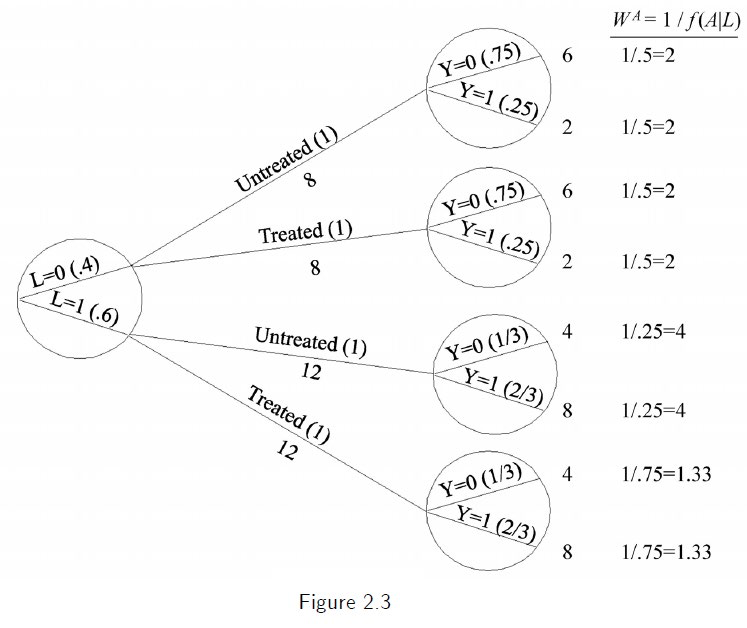

In [102]:
# 构造虚拟人群，按照权重构造
# 生成数据框，有L、A、Y三列
# 其中
# L = 0, A = 0, Y = 0有6个
# L = 0, A = 0, Y = 1有2个
# L = 0, A = 1, Y = 0有6个
# L = 0, A = 1, Y = 1有2个
# L = 1, A = 0, Y = 0有4个
# L = 1, A = 0, Y = 1有8个
# L = 1, A = 1, Y = 0有4个
# L = 1, A = 1, Y = 1有8个
data_new <- data.frame(
  L = c(
    0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
  ),
  A = c(
    0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
  ),
  Y = c(
    0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1
  )
)

In [124]:
# 直接用虚拟人群数据回归
model_new <- lm(Y ~ A, data = data_new)

tidy(model_new)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.000e-01,0.1667,3.000e+00,0.007685
A,7.639e-17,0.2357,3.241e-16,1.000000


In [125]:
# 截距
0.1147 * sqrt(39 / 19)

# A
0.1622 * sqrt(39 / 19)

[1] 0.1643

[1] 0.2324

In [138]:
# 虚拟人群稳健标准误
coeftest(model_new, vcov = vcovHC(model_new, vcov = vcovHC))


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 5.00e-01   1.76e-01    2.85    0.011 *
A           7.64e-17   2.48e-01    0.00    1.000  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [105]:
# 使用svyglm()函数
library(survey)

# 生成调查设计
data_svy <- svydesign(ids = ~1, weights = ~ipw, data = data)

# 使用svyglm()函数
model_svy <- svyglm(Y ~ A, design = data_svy)

tidy(model_svy)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.000e-01,0.2052,2.437e+00,0.02543
A,2.968e-13,0.2513,1.181e-12,1.00000


In [106]:
# 使用稳健权重
data_svy_stabilized <- svydesign(ids = ~1, weights = ~weights_stabilized$ipw.weights, data = data)

model_svy_stabilized <- svyglm(Y ~ A, design = data_svy_stabilized)

tidy(model_svy_stabilized)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.000e-01,0.2052,2.437e+00,0.02543
A,2.968e-13,0.2513,1.181e-12,1.00000


In [107]:
# 使用geeglm()函数
library(geepack)

model_gee <- geeglm(Y ~ A, id = L, data = data, weights = ipw)

tidy(model_gee)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.000e-01,1.414e-01,1.25e+01,0.000407
A,2.969e-13,3.332e-09,7.94e-09,0.999929


In [108]:
# 稳定权重，分子统一为0.5
data$ipw_stable <- 0.5 * data$ipw

In [141]:
# 进行WLS回归
model_stable <- lm(Y ~ A, data = data, weights = ipw_stable)

tidy(model_stable)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.000e-01,0.1667,3.000e+00,0.007685
A,2.967e-13,0.2357,1.259e-12,1.000000


In [146]:
# 使用稳健标准误
coeftest(model_stable, vcov = vcovHC)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 5.00e-01   2.43e-01    2.05    0.055 .
A           2.97e-13   2.88e-01    0.00    1.000  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [110]:
# 构造虚拟人群，按照权重构造
# 生成数据框，有L、A、Y三列
# 其中
# L = 0, A = 0, Y = 0有3个
# L = 0, A = 0, Y = 1有1个
# L = 0, A = 1, Y = 0有3个
# L = 0, A = 1, Y = 1有1个
# L = 1, A = 0, Y = 0有2个
# L = 1, A = 0, Y = 1有4个
# L = 1, A = 1, Y = 0有2个
# L = 1, A = 1, Y = 1有4个
data_new <- data.frame(
  L = c(
    0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
  ),
  A = c(
    0, 0, 0, 0, 1, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1
  ),
  Y = c(
    0, 0, 0, 1, 0, 0, 0, 1,
    0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1
  )
)

In [131]:
# 使用虚拟人群数据进行回归
model_new <- lm(Y ~ A, data = data_new)

tidy(model_new)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.000e-01,0.1667,3.000e+00,0.007685
A,7.639e-17,0.2357,3.241e-16,1.000000


In [140]:
# 对虚拟人群数据进行稳健标准误回归
coeftest(model_new, vcov = vcovHC)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 5.00e-01   1.76e-01    2.85    0.011 *
A           7.64e-17   2.48e-01    0.00    1.000  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
